# Download the data and Pre-processing

In [1]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Go to ur Kaggle account and scroll till u reach create API, Download the file and upload it here.
files.upload()

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d shravankumar9892/image-colorization

image-colorization.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip /content/image-colorization

Archive:  /content/image-colorization.zip
replace ab/ab/ab1.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import tensorflow as tf
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input, decode_predictions
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, InputLayer, Conv2DTranspose, Dropout, BatchNormalization, Input, Concatenate, Activation, concatenate ,RepeatVector ,Reshape ,UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from skimage.transform import resize
from PIL import Image

In [7]:
# draws inputs and predicition
def compareImages(start, end, prediction, gray, color):
    for i in range(start,end):
        f, axarr = plt.subplots(1,3)
        axarr[0].title.set_text('Black and white')  
        axarr[1].title.set_text('Prediction')  
        axarr[2].title.set_text('original')  
        axarr[0].imshow(gray[i], cmap='gray')
        axarr[1].imshow(prediction[i])
        axarr[2].imshow(color[i])

In [8]:
def plotLossAndAcc(history):
    _, subplots = plt.subplots(1,2)
    subplots[0].plot(history.history['acc'])
    subplots[0].set_title('Training Accuracy')
    subplots[0].set_ylabel('Accuracy')
    subplots[0].set_xlabel('epoch')
    
    subplots[1].plot(history.history['loss'])
    subplots[1].set_title('Training Loss')
    subplots[1].set_ylabel('Loss')
    subplots[1].set_xlabel('epoch')

In [9]:
init_images_gray = np.load("/content/l/gray_scale.npy")
init_images_lab = np.load("/content/ab/ab/ab1.npy")

In [10]:
# constants
amount = 2000
width = 224
height = 224

init_images_lab[0][0][0]

array([129, 136], dtype=uint8)

In [11]:
temp1_amount = int(amount)
temp1 = np.zeros((temp1_amount, width, height, 3));
temp1[:,:,:,0] = init_images_gray[0:temp1_amount]
temp1[:,:,:,1:] = init_images_lab[0:temp1_amount]
temp1 = temp1.astype("uint8")
temp1_rgb = []
temp1_gray = np.zeros((temp1_amount, width, height,3 ))

for i in range(0, 3):
    temp1_gray[:temp1_amount, :, :, i] = init_images_gray[:temp1_amount]
    
for i in range(0, temp1_amount):
    temp1_rgb.append(cv2.cvtColor(temp1[i], cv2.COLOR_LAB2RGB))

temp1_rgb = np.array(temp1_rgb)

In [12]:
images_rgb = temp1_rgb
images_gray = temp1_gray

In [15]:
# define the first model
model = Sequential()
model.add(Conv2D(strides = 1,
                 kernel_size = 3,
                 filters = 12,
                 use_bias = True,
                 bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) ,
                 padding = "valid",
                 activation = tf.nn.relu))
model.add(Conv2D(strides = 1,
                 kernel_size = 3, 
                 filters = 12,
                 use_bias = True, 
                 bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid",
                 activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1,
                          kernel_size = 3, 
                          filters = 12, 
                          use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) ,
                          padding = "valid",
                          activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1,
                          kernel_size = 3,
                          filters = 3,
                          use_bias = True, 
                          bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) ,
                          padding = "valid",
                          activation = tf.nn.relu))

model.compile(optimizer = tf.keras.optimizers.Adam(epsilon = 1e-8), loss='mse', metrics=['acc'])

In [16]:
# preprocess images for training
preprocessed_gray_images = preprocess_input(images_gray)
preprocessed_rgb_images = preprocess_input(images_rgb)

In [17]:
model1_checkpoint = ModelCheckpoint("./model_CNN_01.h5",
                            monitor = "loss",
                            mode="min",
                            save_best_only = True,
                            verbose = 1)

In [18]:
# train the model
model1_history = model.fit(preprocessed_gray_images[:temp1_amount],
                           preprocessed_rgb_images,
                           shuffle=True, 
                           callbacks=[model1_checkpoint],
                           epochs = 25, 
                           batch_size = 2)

Epoch 1/30
 997/1000 [============================>.] - ETA: 0s - loss: 0.3165 - acc: 0.5589
Epoch 1: loss improved from inf to 0.31708, saving model to ./model_CNN_01.h5
1000/1000 [==============================] - 14s 6ms/step - loss: 0.3171 - acc: 0.5592
Epoch 2/30
 996/1000 [============================>.] - ETA: 0s - loss: 0.3147 - acc: 0.5663
Epoch 2: loss improved from 0.31708 to 0.31484, saving model to ./model_CNN_01.h5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3148 - acc: 0.5662
Epoch 3/30
 993/1000 [============================>.] - ETA: 0s - loss: 0.3147 - acc: 0.5705
Epoch 3: loss improved from 0.31484 to 0.31442, saving model to ./model_CNN_01.h5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3144 - acc: 0.5714
Epoch 4/30
 992/1000 [============================>.] - ETA: 0s - loss: 0.3139 - acc: 0.5705
Epoch 4: loss improved from 0.31442 to 0.31410, saving model to ./model_CNN_01.h5
1000/1000 [==============================] - 

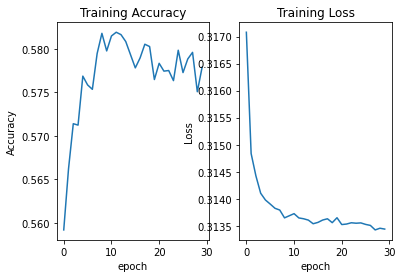

In [19]:
plotLossAndAcc(model1_history)

In [20]:
images_gray_test = images_gray[:250, :, :]

In [21]:
# generate prediction
prediction1 = model.predict(images_gray_test)

8/8 [==============================] - 1s 56ms/step


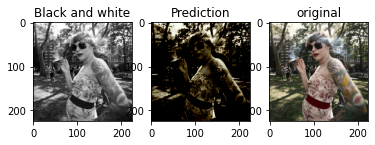

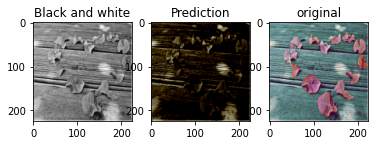

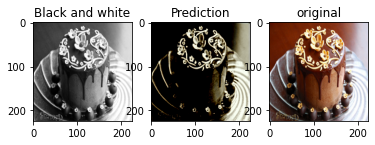

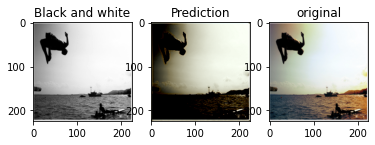

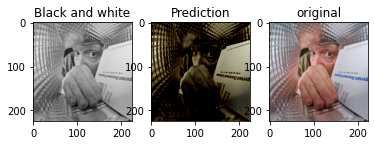

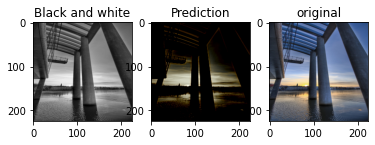

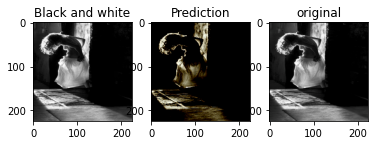

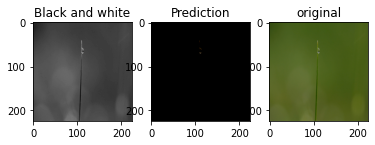

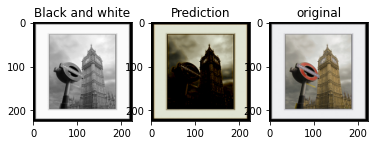

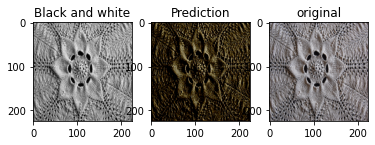

In [22]:
# results
compareImages(0, 10, prediction1, init_images_gray, images_rgb)